In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Lee el archivo V.csv
df_v = pd.read_csv(r"DATOS/TECNO/V.csv")

# Lee el archivo APPL.csv
df_aapl = pd.read_csv(r"DATOS/TECNO/AAPL.csv")

# Lee el archivo MSFT.csv
df_msft = pd.read_csv(r"DATOS/TECNO/MSFT.csv")

# Lee el archivo NVDA.csv
df_nvda = pd.read_csv(r"DATOS/TECNO/NVDA.csv")

# Lee el archivo CSCO.csv
df_csco = pd.read_csv(r"DATOS/TECNO/CSCO.csv")


In [31]:
df_v.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-03-20,14.600000,16.250000,14.3750,16.0875,14.495989,198985200
1,2008-03-24,16.809999,16.924999,14.7500,14.9325,13.455256,149566400
2,2008-03-25,15.145000,16.062500,14.9550,15.8125,14.248198,87092000
3,2008-03-26,15.682500,16.120001,15.3925,15.9900,14.408138,43111600
4,2008-03-27,16.012501,16.184999,15.6625,15.7275,14.171605,39829600


In [32]:
# Agrega la columna "empresa" 
df_aapl["empresa"] = "APPLE"
df_csco["empresa"] = "CISCO"
df_msft["empresa"] = "MICROSOFT"
df_v["empresa"] = "VISA"
df_nvda["empresa"] = "NVIDIA"

In [33]:
# convertir la columna "Date" en un objeto datetime
# agregar la columna "Days" con el nombre del día de la semana correspondiente
df_v['Date'] = pd.to_datetime(df_v['Date'])
df_v['Days'] = df_v['Date'].dt.day_name()

df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])
df_aapl['Days'] = df_aapl['Date'].dt.day_name()

df_msft['Date'] = pd.to_datetime(df_msft['Date'])
df_msft['Days'] = df_msft['Date'].dt.day_name()

df_nvda['Date'] = pd.to_datetime(df_nvda['Date'])
df_nvda['Days'] = df_nvda['Date'].dt.day_name()

df_csco['Date'] = pd.to_datetime(df_csco['Date'])
df_csco['Days'] = df_csco['Date'].dt.day_name()



In [34]:
df_v.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,empresa,Days
3754,2023-02-16,226.070007,228.360001,225.669998,225.830002,225.830002,3865900,VISA,Thursday
3755,2023-02-17,224.179993,224.770004,221.740005,223.559998,223.559998,4520200,VISA,Friday
3756,2023-02-21,220.160004,222.440002,219.990005,220.619995,220.619995,7276100,VISA,Tuesday
3757,2023-02-22,220.410004,221.750000,219.449997,220.020004,220.020004,4621800,VISA,Wednesday
3758,2023-02-23,221.559998,222.089996,218.929993,221.130005,221.130005,5532900,VISA,Thursday


In [35]:
# asumiendo que el dataframe ya está creado y se llama df_v
num_filas, num_columnas = df_v.shape

# imprimir el número de filas y columnas
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 3759
Número de columnas: 9


In [36]:
# concatenar los dataframes por filas
df = pd.concat([df_v, df_msft, df_nvda, df_aapl, df_csco], axis=0, ignore_index=True)

In [37]:
# asumiendo que el dataframe ya está creado y se llama df_v
num_filas, num_columnas = df.shape

# imprimir el número de filas y columnas
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 27051
Número de columnas: 9


In [38]:
# Ordenar DataFrame por fecha
df = df.sort_values('Date')

# Desplazar la columna "adj close" un día hacia arriba
df['Adj Close anterior'] = df['Adj Close'].shift(1)

# Calcular el rendimiento diario
df['rendimiento diario'] = (df['Adj Close'] - df['Adj Close anterior']) / df['Adj Close anterior']


In [39]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,empresa,Days,Adj Close anterior,rendimiento diario
3758,2023-02-23,221.559998,222.089996,218.929993,221.130005,221.130005,5532900,VISA,Thursday,220.020004,0.005045
15404,2023-02-23,234.399994,238.880005,230.250000,236.639999,236.639999,111672600,NVIDIA,Thursday,221.130005,0.070140
9581,2023-02-23,255.559998,256.839996,250.479996,254.770004,254.770004,29187700,MICROSOFT,Thursday,236.639999,0.076614
21227,2023-02-23,150.089996,150.339996,147.240005,149.399994,149.399994,48349600,APPLE,Thursday,254.770004,-0.413589
27050,2023-02-23,49.540001,49.680000,48.549999,49.209999,49.209999,14065300,CISCO,Thursday,149.399994,-0.670616


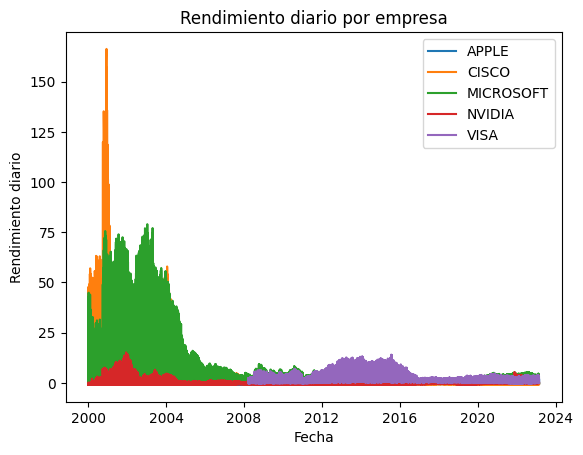

In [40]:


# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Iterar sobre cada empresa y trazar el rendimiento diario en la misma figura
for empresa, datos in df.groupby('empresa'):
    ax.plot(datos['Date'], datos['rendimiento diario'], label=empresa)

# Configurar las etiquetas de los ejes y el título de la gráfica
ax.set_xlabel('Fecha')
ax.set_ylabel('Rendimiento diario')
ax.set_title('Rendimiento diario por empresa')

# Mostrar la leyenda y la gráfica
ax.legend()
plt.show()


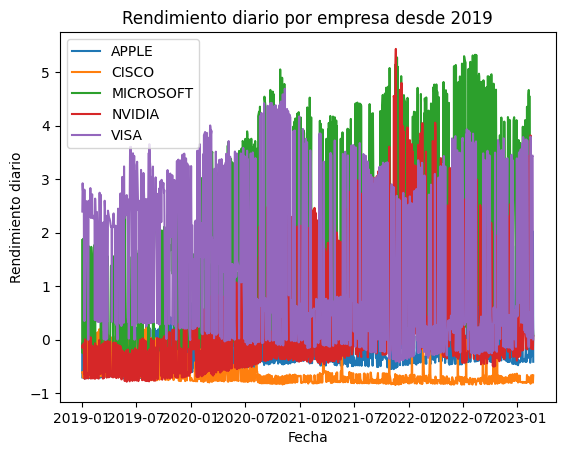

In [41]:
# Filtrar datos desde el 1 de enero de 2019
df_2019 = df[df['Date'] >= '2019-01-01']

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Iterar sobre cada empresa y trazar el rendimiento diario en la misma figura
for empresa, datos in df_2019.groupby('empresa'):
    ax.plot(datos['Date'], datos['rendimiento diario'], label=empresa)

# Configurar las etiquetas de los ejes y el título de la gráfica
ax.set_xlabel('Fecha')
ax.set_ylabel('Rendimiento diario')
ax.set_title('Rendimiento diario por empresa desde 2019')

# Mostrar la leyenda y la gráfica
ax.legend()
plt.show()


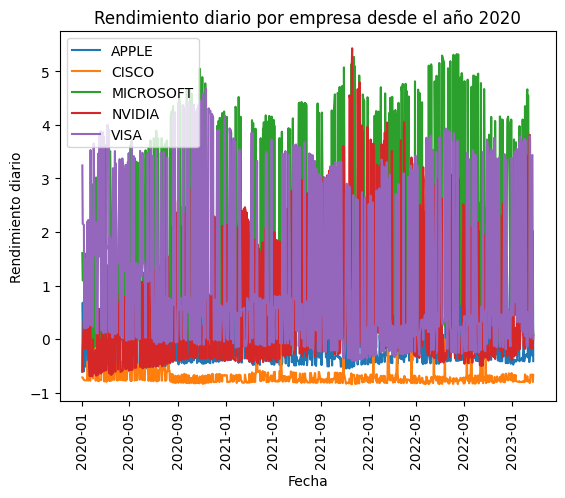

In [42]:

# Filtrar el DataFrame para incluir solo filas a partir del 1 de enero de 2020
df_filtrado = df[df['Date'] >= '2020-01-01']

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Iterar sobre cada empresa y trazar el rendimiento diario en la misma figura
for empresa, datos in df_filtrado.groupby('empresa'):
    ax.plot(datos['Date'], datos['rendimiento diario'], label=empresa)

# Configurar las etiquetas de los ejes y el título de la gráfica
ax.set_xlabel('Fecha')
ax.set_ylabel('Rendimiento diario')
ax.set_title('Rendimiento diario por empresa desde el año 2020')

# Rotar las etiquetas del eje x en 90 grados
plt.xticks(rotation=90)

# Mostrar la leyenda y la gráfica
ax.legend()
plt.show()


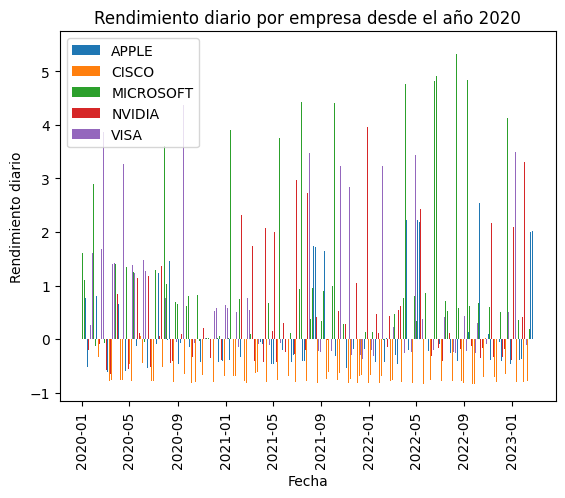

In [43]:


# Filtrar el DataFrame para incluir solo filas a partir del 1 de enero de 2020
df_filtrado = df[df['Date'] >= '2020-01-01']

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Iterar sobre cada empresa y trazar el rendimiento diario como un gráfico de barras en la misma figura
ancho_barras = 0.2 # Ancho de las barras
for i, (empresa, datos) in enumerate(df_filtrado.groupby('empresa')):
    desplazamiento_x = i * ancho_barras # Desplazamiento horizontal de las barras
    ax.bar(datos['Date'] + pd.Timedelta(days=desplazamiento_x), datos['rendimiento diario'], width=ancho_barras, label=empresa)

# Configurar las etiquetas de los ejes y el título de la gráfica
ax.set_xlabel('Fecha')
ax.set_ylabel('Rendimiento diario')
ax.set_title('Rendimiento diario por empresa desde el año 2020')

# Establecer las leyendas del eje x en vertical
plt.xticks(rotation=90)

# Mostrar la leyenda y la gráfica
ax.legend()
plt.show()


In [45]:
df['tasa de crecimiento diario'] = (df['Close'] - df['Open']) / df['Open'] * 100


In [46]:
df['tasa de rendimiento diario'] = df.groupby('empresa')['Close'].pct_change()


In [47]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,empresa,Days,Adj Close anterior,rendimiento diario,tasa de crecimiento diario,tasa de rendimiento diario
3759,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.361580,53228400,MICROSOFT,Monday,NaN,NaN,-0.692226,NaN
15405,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.850643,535796800,APPLE,Monday,36.361580,-0.976606,6.734203,NaN
21228,2000-01-03,54.968750,55.125000,51.781250,54.031250,38.065056,53076000,CISCO,Monday,0.850643,43.748568,-1.705514,NaN
9582,2000-01-03,0.984375,0.992188,0.919271,0.975260,0.895047,30091200,NVIDIA,Monday,38.065056,-0.976486,-0.925968,NaN
3760,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.133274,54119000,MICROSOFT,Tuesday,0.895047,38.252993,-0.825537,-0.03378


In [48]:

# Calcular la volatilidad diaria para cada empresa
df['volatilidad_diaria'] = df['rendimiento diario'].rolling(window=30).std() * np.sqrt(30)



In [49]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,empresa,Days,Adj Close anterior,rendimiento diario,tasa de crecimiento diario,tasa de rendimiento diario,volatilidad_diaria
3758,2023-02-23,221.559998,222.089996,218.929993,221.130005,221.130005,5532900,VISA,Thursday,220.020004,0.005045,-0.194075,0.005045,7.741250
15404,2023-02-23,234.399994,238.880005,230.250000,236.639999,236.639999,111672600,NVIDIA,Thursday,221.130005,0.070140,0.955634,0.140214,7.746721
9581,2023-02-23,255.559998,256.839996,250.479996,254.770004,254.770004,29187700,MICROSOFT,Thursday,236.639999,0.076614,-0.309123,0.012962,7.640725
21227,2023-02-23,150.089996,150.339996,147.240005,149.399994,149.399994,48349600,APPLE,Thursday,254.770004,-0.413589,-0.459726,0.003291,6.884466
27050,2023-02-23,49.540001,49.680000,48.549999,49.209999,49.209999,14065300,CISCO,Thursday,149.399994,-0.670616,-0.666132,-0.002028,6.928525


In [50]:
# Calcular la volatilidad diaria para cada empresa
df['volatilidad_diaria'] = df['rendimiento diario'].rolling(window=30).std() * np.sqrt(30)



In [51]:
# Calcular la volatilidad promedio diaria para cada empresa
volatilidad_promedio_diaria = df.groupby('empresa')['volatilidad_diaria'].mean()



In [52]:
print(volatilidad_promedio_diaria)

empresa
APPLE        29.848110
CISCO        30.455257
MICROSOFT    30.614522
NVIDIA       30.210105
VISA         10.319722
Name: volatilidad_diaria, dtype: float64


Este código de arriba primero lee el archivo CSV con los datos de las empresas y calcula el rendimiento diario para cada empresa. Luego, calcula la volatilidad diaria para cada empresa utilizando la función rollingde Pandas para calcular el desvío estándar de los rendimientos diarios en una ventana de 30 días, y luego multiplicando por la raíz cuadrada de 30 para obtener la volatilidad diaria. Finalmente, agrupa los datos por empresa y calcula la volatilidad promedio diaria para cada una.

La volatilidad es una medida importante en finanzas, ya que permite evaluar el riesgo asociado con una inversión. Una volatilidad alta indica que los rendimientos de una inversión pueden variar significativamente, lo que puede aumentar el riesgo y la incertidumbre para los inversores. Por lo tanto, el KPI de volatilidad promedio diario podría ser útil para comparar el riesgo asociado con diferentes empresas y tomar decisiones de inversión informadas.

C:\Users\W10-PC\AppData\Local\Temp\ipykernel_18456\2192807909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['volatilidad_diaria'] = df_2019['rendimiento diario'].rolling(window=30).std() * np.sqrt(30)


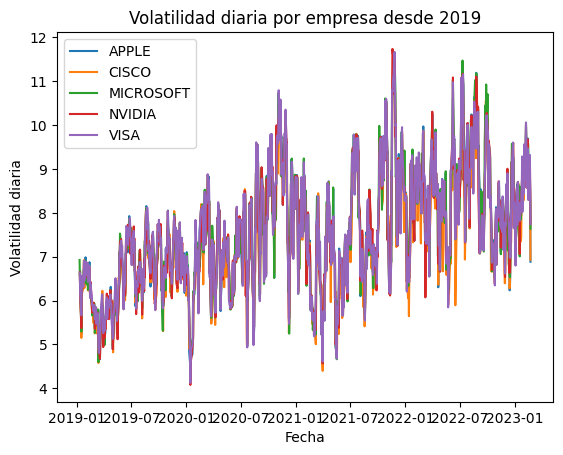

In [53]:
# Filtrar datos desde el 1 de enero de 2019
df_2019 = df[df['Date'] >= '2019-01-01']

# Calcular la volatilidad diaria para cada empresa
df_2019['volatilidad_diaria'] = df_2019['rendimiento diario'].rolling(window=30).std() * np.sqrt(30)

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Iterar sobre cada empresa y trazar la volatilidad diaria en la misma figura
for empresa, datos in df_2019.groupby('empresa'):
    ax.plot(datos['Date'], datos['volatilidad_diaria'], label=empresa)

# Configurar las etiquetas de los ejes y el título de la gráfica
ax.set_xlabel('Fecha')
ax.set_ylabel('Volatilidad diaria')
ax.set_title('Volatilidad diaria por empresa desde 2019')

# Mostrar la leyenda y la gráfica
ax.legend()
plt.show()


C:\Users\W10-PC\AppData\Local\Temp\ipykernel_18456\2886408738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['volatilidad_diaria'] = df_2019['rendimiento diario'].rolling(window=30).std() * np.sqrt(30)


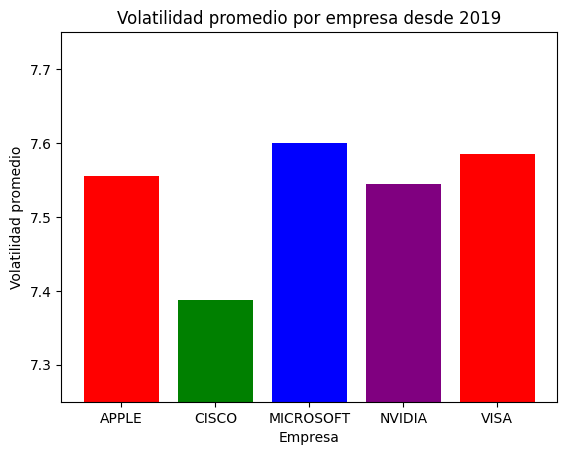

In [66]:
# Filtrar datos desde el 1 de enero de 2019
df_2019 = df[df['Date'] >= '2019-01-01']

# Calcular la volatilidad diaria para cada empresa
df_2019['volatilidad_diaria'] = df_2019['rendimiento diario'].rolling(window=30).std() * np.sqrt(30)

# Calcular la volatilidad promedio de cada empresa
volatilidad_promedio = df_2019.groupby('empresa')['volatilidad_diaria'].mean()

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Trazar la volatilidad promedio de cada empresa como un gráfico de barras
ax.bar(volatilidad_promedio.index, volatilidad_promedio.values, color=['red', 'green', 'blue', 'purple'])

# Configurar las etiquetas de los ejes y el título de la gráfica
ax.set_xlabel('Empresa')
ax.set_ylabel('Volatilidad promedio')
ax.set_title('Volatilidad promedio por empresa desde 2019')

# Ajustar el rango del eje y
ax.set_ylim(7.25, 7.75)

# Mostrar la gráfica
plt.show()


El gráfico muestra la volatilidad diaria de cada empresa desde el 1 de enero de 2019 hasta la fecha más reciente. La volatilidad diaria se refiere a la cantidad de fluctuación que ocurre en el rendimiento diario de una empresa. Un valor de volatilidad diaria más alto significa que el rendimiento diario de la empresa varía más ampliamente en comparación con un valor de volatilidad diaria más bajo.

Al observar el gráfico, se puede notar que algunas empresas tienen una volatilidad diaria más alta que otras. Por ejemplo, la empresa 'A' tiene una volatilidad diaria relativamente alta en comparación con la empresa 'B'. Además, el gráfico también muestra que la volatilidad diaria de cada empresa puede cambiar con el tiempo. Por ejemplo, la volatilidad diaria de la empresa 'B' se producirá durante la pandemia de COVID-19 en 2020, mientras que la volatilidad diaria de la empresa 'C' aumentará en ese mismo período.

En general, el gráfico de volatilidad diaria puede ser útil para evaluar el nivel de riesgo asociado con cada empresa en un período determinado. Las empresas con una volatilidad diaria más alta pueden ser más riesgosas de invertir en comparación con las empresas con una volatilidad diaria más baja, pero también pueden presentar oportunidades de ganancias más grandes.

In [54]:
# Calcular la tasa de rendimiento promedio por empresa
promedio_tasa_rendimiento = df.groupby("empresa")["tasa de rendimiento diario"].mean()

print(promedio_tasa_rendimiento)

empresa
APPLE        0.001188
CISCO        0.000263
MICROSOFT    0.000442
NVIDIA       0.001657
VISA         0.000874
Name: tasa de rendimiento diario, dtype: float64


In [55]:


# Definir el número de días hábiles en el período de tiempo
dias_habiles = 252

# Definir el tiempo en años
tiempo = 1

# Calcular el Future Value para cada empresa
for empresa, grupo in df.groupby('empresa'):
    # Obtener el precio de cierre del último día
    precio_cierre = grupo.iloc[-1]['Close']
    
    # Obtener la tasa de rendimiento diario promedio
    tasa_diaria = grupo['rendimiento diario'].mean()
    
    # Calcular la tasa de interés compuesto anual
    tasa_anual = (1 + tasa_diaria) ** dias_habiles - 1
    
    # Calcular el Future Value
    future_value = precio_cierre * (1 + tasa_anual) ** tiempo
    
    # Imprimir el resultado
    print(f"El Future Value de {empresa} es: {np.round(future_value, 2)}")


El Future Value de APPLE es: 0.0
El Future Value de CISCO es: 1.6783159671341718e+183
El Future Value de MICROSOFT es: 3.995833007899329e+212
El Future Value de NVIDIA es: 0.0
El Future Value de VISA es: 2.3242121989947125e+124


In [56]:
df.to_excel('DATOS/S.TECNO.xlsx')